# Dataset
The following categorical variables have been encoded into numberic ordinal scale:

- Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

- EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

- RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

# Libraries

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data


In [98]:
#Read CSV
df = pd.read_csv('hr_attrition_data.csv')
# Add colums with categorical variables for visualization
df['Attrition_Flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Education_label'] = df['Education'].map({1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'})
df['EnvironmentSatisfaction_label'] = df['EnvironmentSatisfaction'].map({ 1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['JobInvolvement_label'] = df['JobInvolvement'].map({1 : 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['JobSatisfaction_label'] = df['JobSatisfaction'].map({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['PerformanceRating_label'] = df['PerformanceRating'].map({1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'})
df['RelationshipSatisfaction_label'] = df['RelationshipSatisfaction'].map({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['WorkLifeBalance_label'] = df['WorkLifeBalance'].map({1:'Bad',2:'Good', 3: 'Better', 4: 'Best'})
#df.info()


In [99]:
#Show first 5 data entries
#df.head(5)

In [100]:
# Find duplicate rows based EmployeeCount, Over18 and StandardHours
duplicate = df[df.duplicated(['EmployeeCount', 'Over18', 'StandardHours'])]
print("Duplicate Rows based on EmployeeCount, Over18, StandardHours :")
duplicate[['EmployeeCount', 'Over18', 'StandardHours']].head(5)
 

Duplicate Rows based on EmployeeCount, Over18, StandardHours :


,EmployeeCount,Over18,StandardHours
1,1,Y,80
2,1,Y,80
3,1,Y,80
4,1,Y,80
5,1,Y,80


In [101]:
# Count duplicate rows based EmployeeCount, Over18 and StandardHours
print("Duplicate Rows:")
duplicate[['EmployeeCount', 'Over18', 'StandardHours']].shape[0]

Duplicate Rows:


1469

# Preprocessing

In [102]:
# Remove columns with duplicated rows
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [103]:
#Exployees by gender
df_gender = df.groupby(['Gender'])['Gender'].value_counts(normalize=False).reset_index(name='count')
df_gender = df_gender.sort_values(by='count', ascending=False)  # Sort by Count
df_gender

,Gender,count
1,Male,882
0,Female,588


In [104]:
#Attrition by gender
contingency_table_gender = pd.crosstab(df['Gender'], df['Attrition'])
contingency_table_gender

Attrition,No,Yes
Gender,,
Female,501,87
Male,732,150


In [105]:
from scipy.stats import chi2_contingency

# Run chi-square test
chi2, p_val, dof, expected_val = chi2_contingency(contingency_table_gender)

print(f"\nChi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_val:.4f}")

if p_val <= 0.05:
    print("Result: Significant association between Gender and Attrition.")
else:
    print("Result: No significant association between Gender and Attrition.")


Chi-square statistic: 1.1170
Degrees of freedom: 1
P-value: 0.2906
Result: No significant association between Gender and Attrition.


# Attrition Calculations by Gender

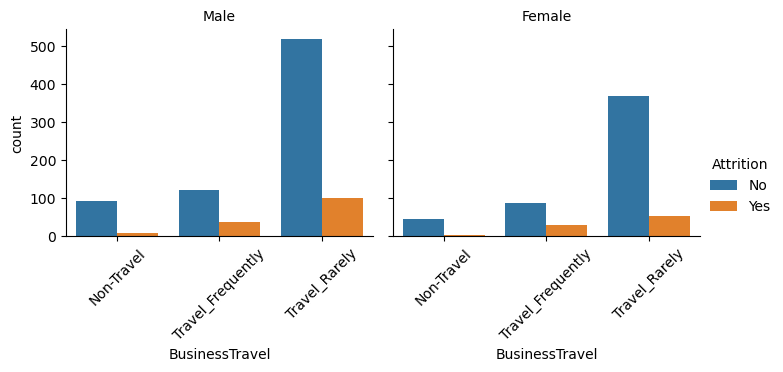


Table for BusinessTravel:
| BusinessTravel    | Gender   | Attrition   | count   |
|:------------------|:---------|:------------|:--------|
| Travel_Rarely     | Male     | No          | 519     |
| Travel_Rarely     | Female   | No          | 368     |
| Travel_Frequently | Male     | No          | 121     |
| Travel_Rarely     | Male     | Yes         | 102     |
| Non-Travel        | Male     | No          | 92      |
| Travel_Frequently | Female   | No          | 87      |
| Travel_Rarely     | Female   | Yes         | 54      |
| Non-Travel        | Female   | No          | 46      |
| Travel_Frequently | Male     | Yes         | 39      |
| Travel_Frequently | Female   | Yes         | 30      |
| Non-Travel        | Male     | Yes         | 9       |
| Non-Travel        | Female   | Yes         | 3       |


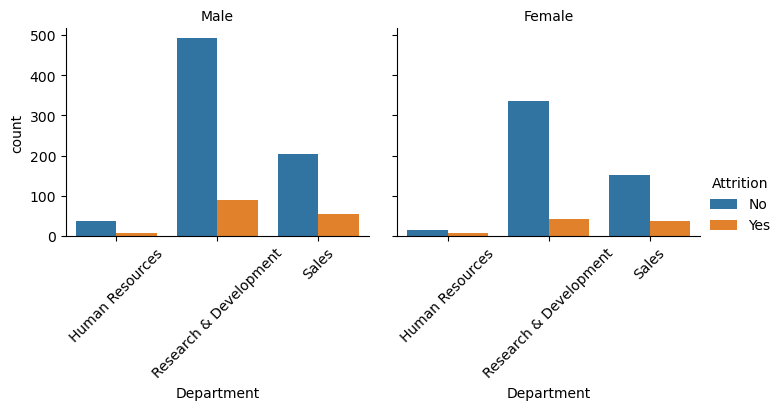


Table for Department:
| Department             | Gender   | Attrition   | count   |
|:-----------------------|:---------|:------------|:--------|
| Research & Development | Male     | No          | 492     |
| Research & Development | Female   | No          | 336     |
| Sales                  | Male     | No          | 203     |
| Sales                  | Female   | No          | 151     |
| Research & Development | Male     | Yes         | 90      |
| Sales                  | Male     | Yes         | 54      |
| Research & Development | Female   | Yes         | 43      |
| Sales                  | Female   | Yes         | 38      |
| Human Resources        | Male     | No          | 37      |
| Human Resources        | Female   | No          | 14      |
| Human Resources        | Male     | Yes         | 6       |
| Human Resources        | Female   | Yes         | 6       |


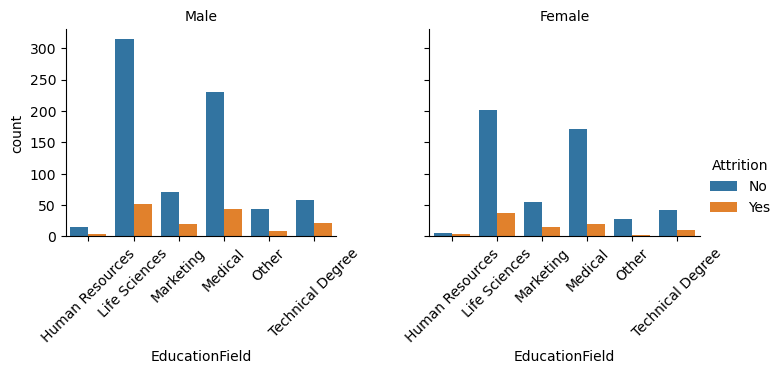


Table for EducationField:
| EducationField   | Gender   | Attrition   | count   |
|:-----------------|:---------|:------------|:--------|
| Life Sciences    | Male     | No          | 315     |
| Medical          | Male     | No          | 230     |
| Life Sciences    | Female   | No          | 202     |
| Medical          | Female   | No          | 171     |
| Marketing        | Male     | No          | 70      |
| Technical Degree | Male     | No          | 58      |
| Marketing        | Female   | No          | 54      |
| Life Sciences    | Male     | Yes         | 51      |
| Other            | Male     | No          | 44      |
| Medical          | Male     | Yes         | 44      |
| Technical Degree | Female   | No          | 42      |
| Life Sciences    | Female   | Yes         | 38      |
| Other            | Female   | No          | 27      |
| Technical Degree | Male     | Yes         | 22      |
| Marketing        | Male     | Yes         | 20      |
| Medical          | 

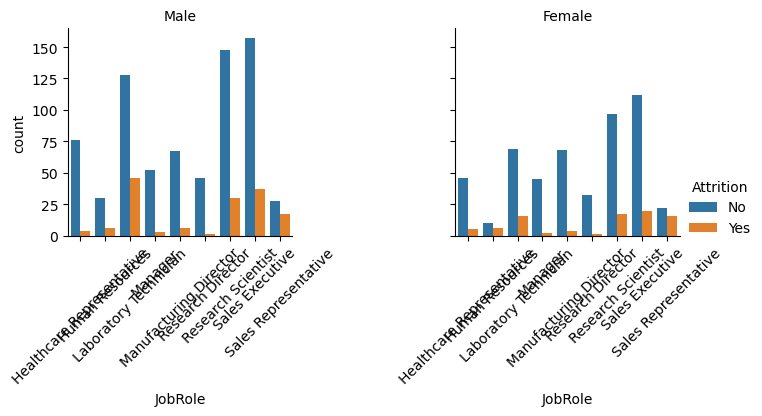


Table for JobRole:
| JobRole                   | Gender   | Attrition   | count   |
|:--------------------------|:---------|:------------|:--------|
| Sales Executive           | Male     | No          | 157     |
| Research Scientist        | Male     | No          | 148     |
| Laboratory Technician     | Male     | No          | 128     |
| Sales Executive           | Female   | No          | 112     |
| Research Scientist        | Female   | No          | 97      |
| Healthcare Representative | Male     | No          | 76      |
| Laboratory Technician     | Female   | No          | 69      |
| Manufacturing Director    | Female   | No          | 68      |
| Manufacturing Director    | Male     | No          | 67      |
| Manager                   | Male     | No          | 52      |
| Healthcare Representative | Female   | No          | 46      |
| Laboratory Technician     | Male     | Yes         | 46      |
| Research Director         | Male     | No          | 46      |
| Man

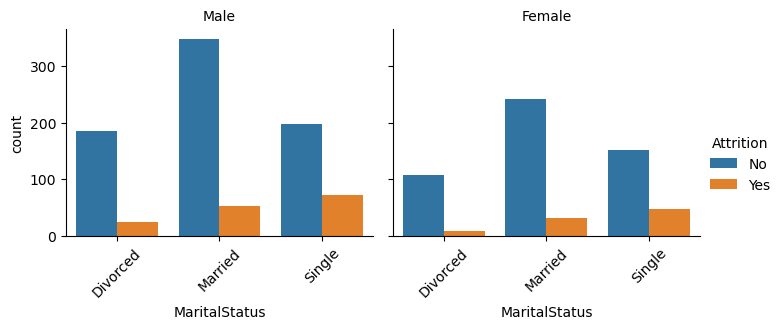


Table for MaritalStatus:
| MaritalStatus   | Gender   | Attrition   | count   |
|:----------------|:---------|:------------|:--------|
| Married         | Male     | No          | 348     |
| Married         | Female   | No          | 241     |
| Single          | Male     | No          | 198     |
| Divorced        | Male     | No          | 186     |
| Single          | Female   | No          | 152     |
| Divorced        | Female   | No          | 108     |
| Single          | Male     | Yes         | 73      |
| Married         | Male     | Yes         | 53      |
| Single          | Female   | Yes         | 47      |
| Married         | Female   | Yes         | 31      |
| Divorced        | Male     | Yes         | 24      |
| Divorced        | Female   | Yes         | 9       |


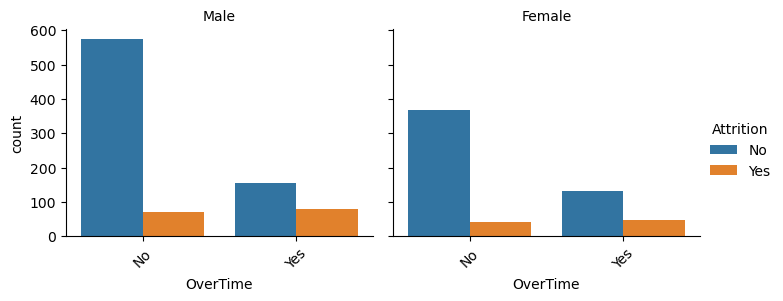


Table for OverTime:
| OverTime   | Gender   | Attrition   | count   |
|:-----------|:---------|:------------|:--------|
| No         | Male     | No          | 576     |
| No         | Female   | No          | 368     |
| Yes        | Male     | No          | 156     |
| Yes        | Female   | No          | 133     |
| Yes        | Male     | Yes         | 80      |
| No         | Male     | Yes         | 70      |
| Yes        | Female   | Yes         | 47      |
| No         | Female   | Yes         | 40      |


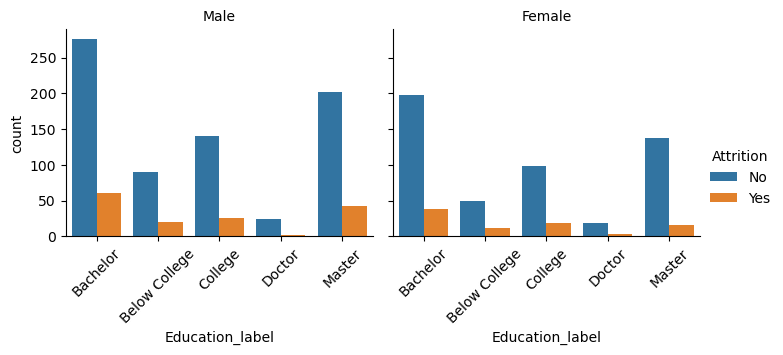


Table for Education_label:
| Education_label   | Gender   | Attrition   | count   |
|:------------------|:---------|:------------|:--------|
| Bachelor          | Male     | No          | 276     |
| Master            | Male     | No          | 202     |
| Bachelor          | Female   | No          | 197     |
| College           | Male     | No          | 140     |
| Master            | Female   | No          | 138     |
| College           | Female   | No          | 98      |
| Below College     | Male     | No          | 90      |
| Bachelor          | Male     | Yes         | 61      |
| Below College     | Female   | No          | 49      |
| Master            | Male     | Yes         | 42      |
| Bachelor          | Female   | Yes         | 38      |
| College           | Male     | Yes         | 25      |
| Doctor            | Male     | No          | 24      |
| Below College     | Male     | Yes         | 20      |
| Doctor            | Female   | No          | 19      |
| C

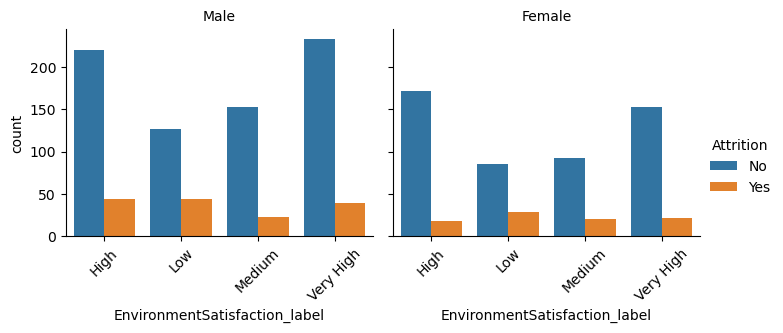


Table for EnvironmentSatisfaction_label:
| EnvironmentSatisfaction_label   | Gender   | Attrition   | count   |
|:--------------------------------|:---------|:------------|:--------|
| Very High                       | Male     | No          | 233     |
| High                            | Male     | No          | 220     |
| High                            | Female   | No          | 171     |
| Very High                       | Female   | No          | 153     |
| Medium                          | Male     | No          | 152     |
| Low                             | Male     | No          | 127     |
| Medium                          | Female   | No          | 92      |
| Low                             | Female   | No          | 85      |
| High                            | Male     | Yes         | 44      |
| Low                             | Male     | Yes         | 44      |
| Very High                       | Male     | Yes         | 39      |
| Low                             |

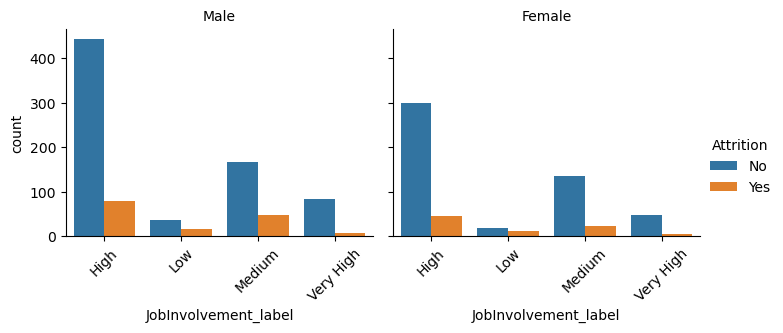


Table for JobInvolvement_label:
| JobInvolvement_label   | Gender   | Attrition   | count   |
|:-----------------------|:---------|:------------|:--------|
| High                   | Male     | No          | 444     |
| High                   | Female   | No          | 299     |
| Medium                 | Male     | No          | 168     |
| Medium                 | Female   | No          | 136     |
| Very High              | Male     | No          | 84      |
| High                   | Male     | Yes         | 79      |
| Medium                 | Male     | Yes         | 48      |
| Very High              | Female   | No          | 47      |
| High                   | Female   | Yes         | 46      |
| Low                    | Male     | No          | 36      |
| Medium                 | Female   | Yes         | 23      |
| Low                    | Female   | No          | 19      |
| Low                    | Male     | Yes         | 16      |
| Low                    | Female   |

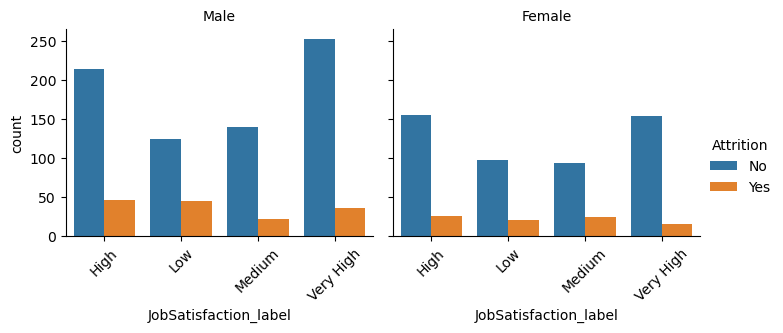


Table for JobSatisfaction_label:
| JobSatisfaction_label   | Gender   | Attrition   | count   |
|:------------------------|:---------|:------------|:--------|
| Very High               | Male     | No          | 253     |
| High                    | Male     | No          | 214     |
| High                    | Female   | No          | 155     |
| Very High               | Female   | No          | 154     |
| Medium                  | Male     | No          | 140     |
| Low                     | Male     | No          | 125     |
| Low                     | Female   | No          | 98      |
| Medium                  | Female   | No          | 94      |
| High                    | Male     | Yes         | 47      |
| Low                     | Male     | Yes         | 45      |
| Very High               | Male     | Yes         | 36      |
| High                    | Female   | Yes         | 26      |
| Medium                  | Female   | Yes         | 24      |
| Medium             

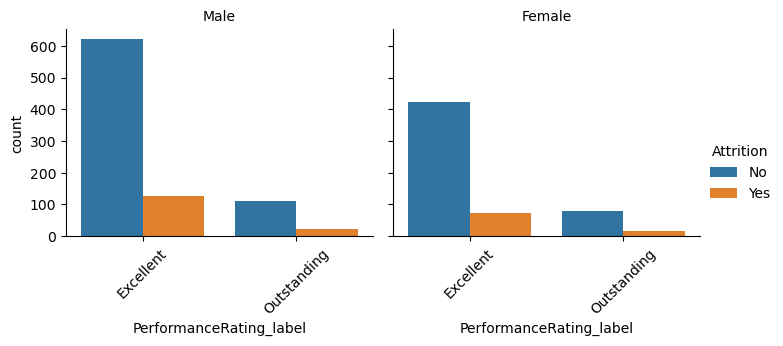


Table for PerformanceRating_label:
| PerformanceRating_label   | Gender   | Attrition   | count   |
|:--------------------------|:---------|:------------|:--------|
| Excellent                 | Male     | No          | 622     |
| Excellent                 | Female   | No          | 422     |
| Excellent                 | Male     | Yes         | 128     |
| Outstanding               | Male     | No          | 110     |
| Outstanding               | Female   | No          | 79      |
| Excellent                 | Female   | Yes         | 72      |
| Outstanding               | Male     | Yes         | 22      |
| Outstanding               | Female   | Yes         | 15      |


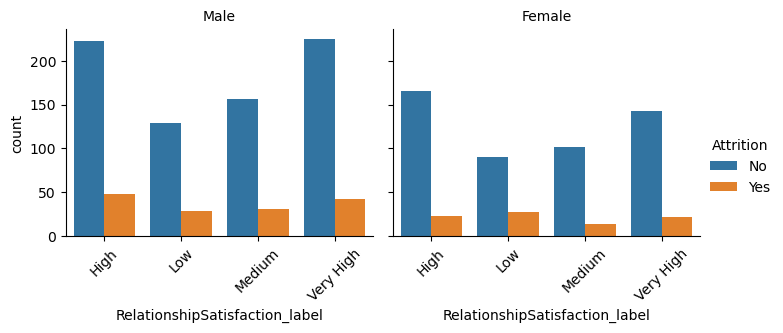


Table for RelationshipSatisfaction_label:
| RelationshipSatisfaction_label   | Gender   | Attrition   | count   |
|:---------------------------------|:---------|:------------|:--------|
| Very High                        | Male     | No          | 225     |
| High                             | Male     | No          | 222     |
| High                             | Female   | No          | 166     |
| Medium                           | Male     | No          | 156     |
| Very High                        | Female   | No          | 143     |
| Low                              | Male     | No          | 129     |
| Medium                           | Female   | No          | 102     |
| Low                              | Female   | No          | 90      |
| High                             | Male     | Yes         | 48      |
| Very High                        | Male     | Yes         | 42      |
| Medium                           | Male     | Yes         | 31      |
| Low                

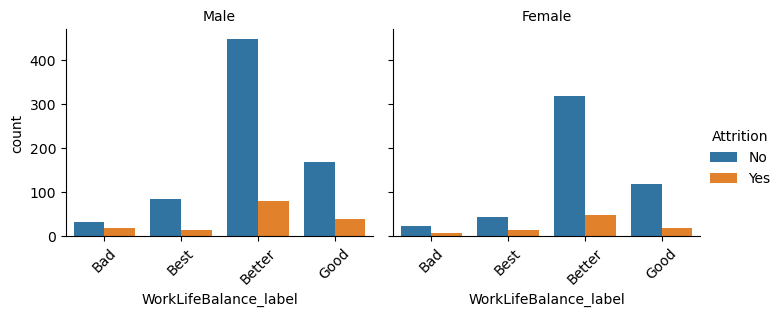


Table for WorkLifeBalance_label:
| WorkLifeBalance_label   | Gender   | Attrition   | count   |
|:------------------------|:---------|:------------|:--------|
| Better                  | Male     | No          | 448     |
| Better                  | Female   | No          | 318     |
| Good                    | Male     | No          | 169     |
| Good                    | Female   | No          | 117     |
| Best                    | Male     | No          | 83      |
| Better                  | Male     | Yes         | 80      |
| Better                  | Female   | Yes         | 47      |
| Best                    | Female   | No          | 43      |
| Good                    | Male     | Yes         | 39      |
| Bad                     | Male     | No          | 32      |
| Bad                     | Female   | No          | 23      |
| Good                    | Female   | Yes         | 19      |
| Bad                     | Male     | Yes         | 18      |
| Best               

In [106]:
def create_plots(data, categorical_vars, y_var, gender_var):
    """
    Creates a panel of bar plots for categorical variables, arranged in a grid,
    with a specified y-variable, displaying percentages instead of counts.  Also
    prints a table of the counts and percentages, sorted by percentage.

    Args:
        data: pandas DataFrame containing the data.
        categorical_vars: List of categorical column names to create bar plots for.
        y_var: The variable to use for grouping the bars within each category.
    """
    # Create bar plots for categorical variables
    for var in categorical_vars:
        # Calculate percentages
        df_agg = data.groupby([var, gender_var])[y_var].value_counts(normalize=False).reset_index(name='count')
        df_agg = df_agg.sort_values(by='count', ascending=False)  # Sort by Count

        # Use a FacetGrid to create separate plots for each gender
        g = sns.FacetGrid(df_agg, col=gender_var, col_wrap=2, height=3, aspect=1.2)  # Adjust col_wrap as needed
        g.map(sns.barplot, var, 'count', y_var,  order=sorted(data[var].unique()), hue = y_var, hue_order = ["No","Yes"], palette="tab10")
        g.set_axis_labels(var, 'count')
        g.set_titles(col_template="{col_name}")  # Set title for each facet
        g.add_legend(title=y_var)  # Add a legend with title y_var
        g.tick_params(axis='x', rotation=45)
        plt.show()  # Show the plots      

        # Print the table of counts and percentages
        print(f"\nTable for {var}:")
        print(df_agg.astype(str).to_markdown(index=False, numalign="left", stralign="left"))



if __name__ == '__main__':
 
    # List categorical columns you want to analyze
    categorical_cols_to_analyze = df.select_dtypes(include=object).columns
    # Remove Attrition colum
    categorical_cols_to_analyze = [column_x for column_x in categorical_cols_to_analyze  if column_x not in ['Attrition','Gender']]

    y_var = 'Attrition'
    gender_var = 'Gender'

    create_plots(df, categorical_cols_to_analyze, y_var, gender_var)


In [107]:
def get_chisqr(data, categorical_vars, y_var, gender_var):
    """
    Runs Chi-tests

    Args:
        data: pandas DataFrame containing the data.
        categorical_vars: List of categorical column names to create bar plots for.
        y_var: The variable to use for crosstab.
        gender_var: The variable to use for crosstab.
    """
    # Create bar plots for categorical variables
    for var in categorical_vars:
        # Contingency Table
        contingency_table_gender_cat = pd.crosstab(data[gender_var],[data[y_var] , data[var]])
        # Chi-test
        chi2_gender_cat, p_gender_cat, dof_gender_cat, expected_gender_cat = chi2_contingency(contingency_table_gender_cat)
        # Print the table of counts 
        print(f"\nResults chi-square {gender_var}, {y_var}, {var}, Chi2: {chi2_gender_cat}, p-value: {p_gender_cat}")
   
  
if __name__ == '__main__':
 
    # List categorical columns you want to analyze
    categorical_cols_to_analyze = df.select_dtypes(include=object).columns
    # Remove Attrition colum
    categorical_cols_to_analyze = [column_x for column_x in categorical_cols_to_analyze  if column_x not in ['Attrition','Gender']]

    y_var = 'Attrition'
    gender_var = 'Gender'


    get_chisqr(df, categorical_cols_to_analyze, y_var, gender_var)
    


Results chi-square Gender, Attrition, BusinessTravel, Chi2: 7.020749137380985, p-value: 0.21910173674625155

Results chi-square Gender, Attrition, Department, Chi2: 8.326981977680344, p-value: 0.1391119570055334

Results chi-square Gender, Attrition, EducationField, Chi2: 10.31791197257246, p-value: 0.5020378122976819

Results chi-square Gender, Attrition, JobRole, Chi2: 22.979326422683926, p-value: 0.14992493489650888

Results chi-square Gender, Attrition, MaritalStatus, Chi2: 5.824002406694014, p-value: 0.32372272462964513

Results chi-square Gender, Attrition, OverTime, Chi2: 5.851645451031642, p-value: 0.11905535583805828

Results chi-square Gender, Attrition, Education_label, Chi2: 7.456186490175171, p-value: 0.5897351119954755

Results chi-square Gender, Attrition, EnvironmentSatisfaction_label, Chi2: 7.35824229967841, p-value: 0.39255630496854094

Results chi-square Gender, Attrition, JobInvolvement_label, Chi2: 7.014541183112593, p-value: 0.4273674070195258

Results chi-square

## Analyze multiple numerical variables by creating functions

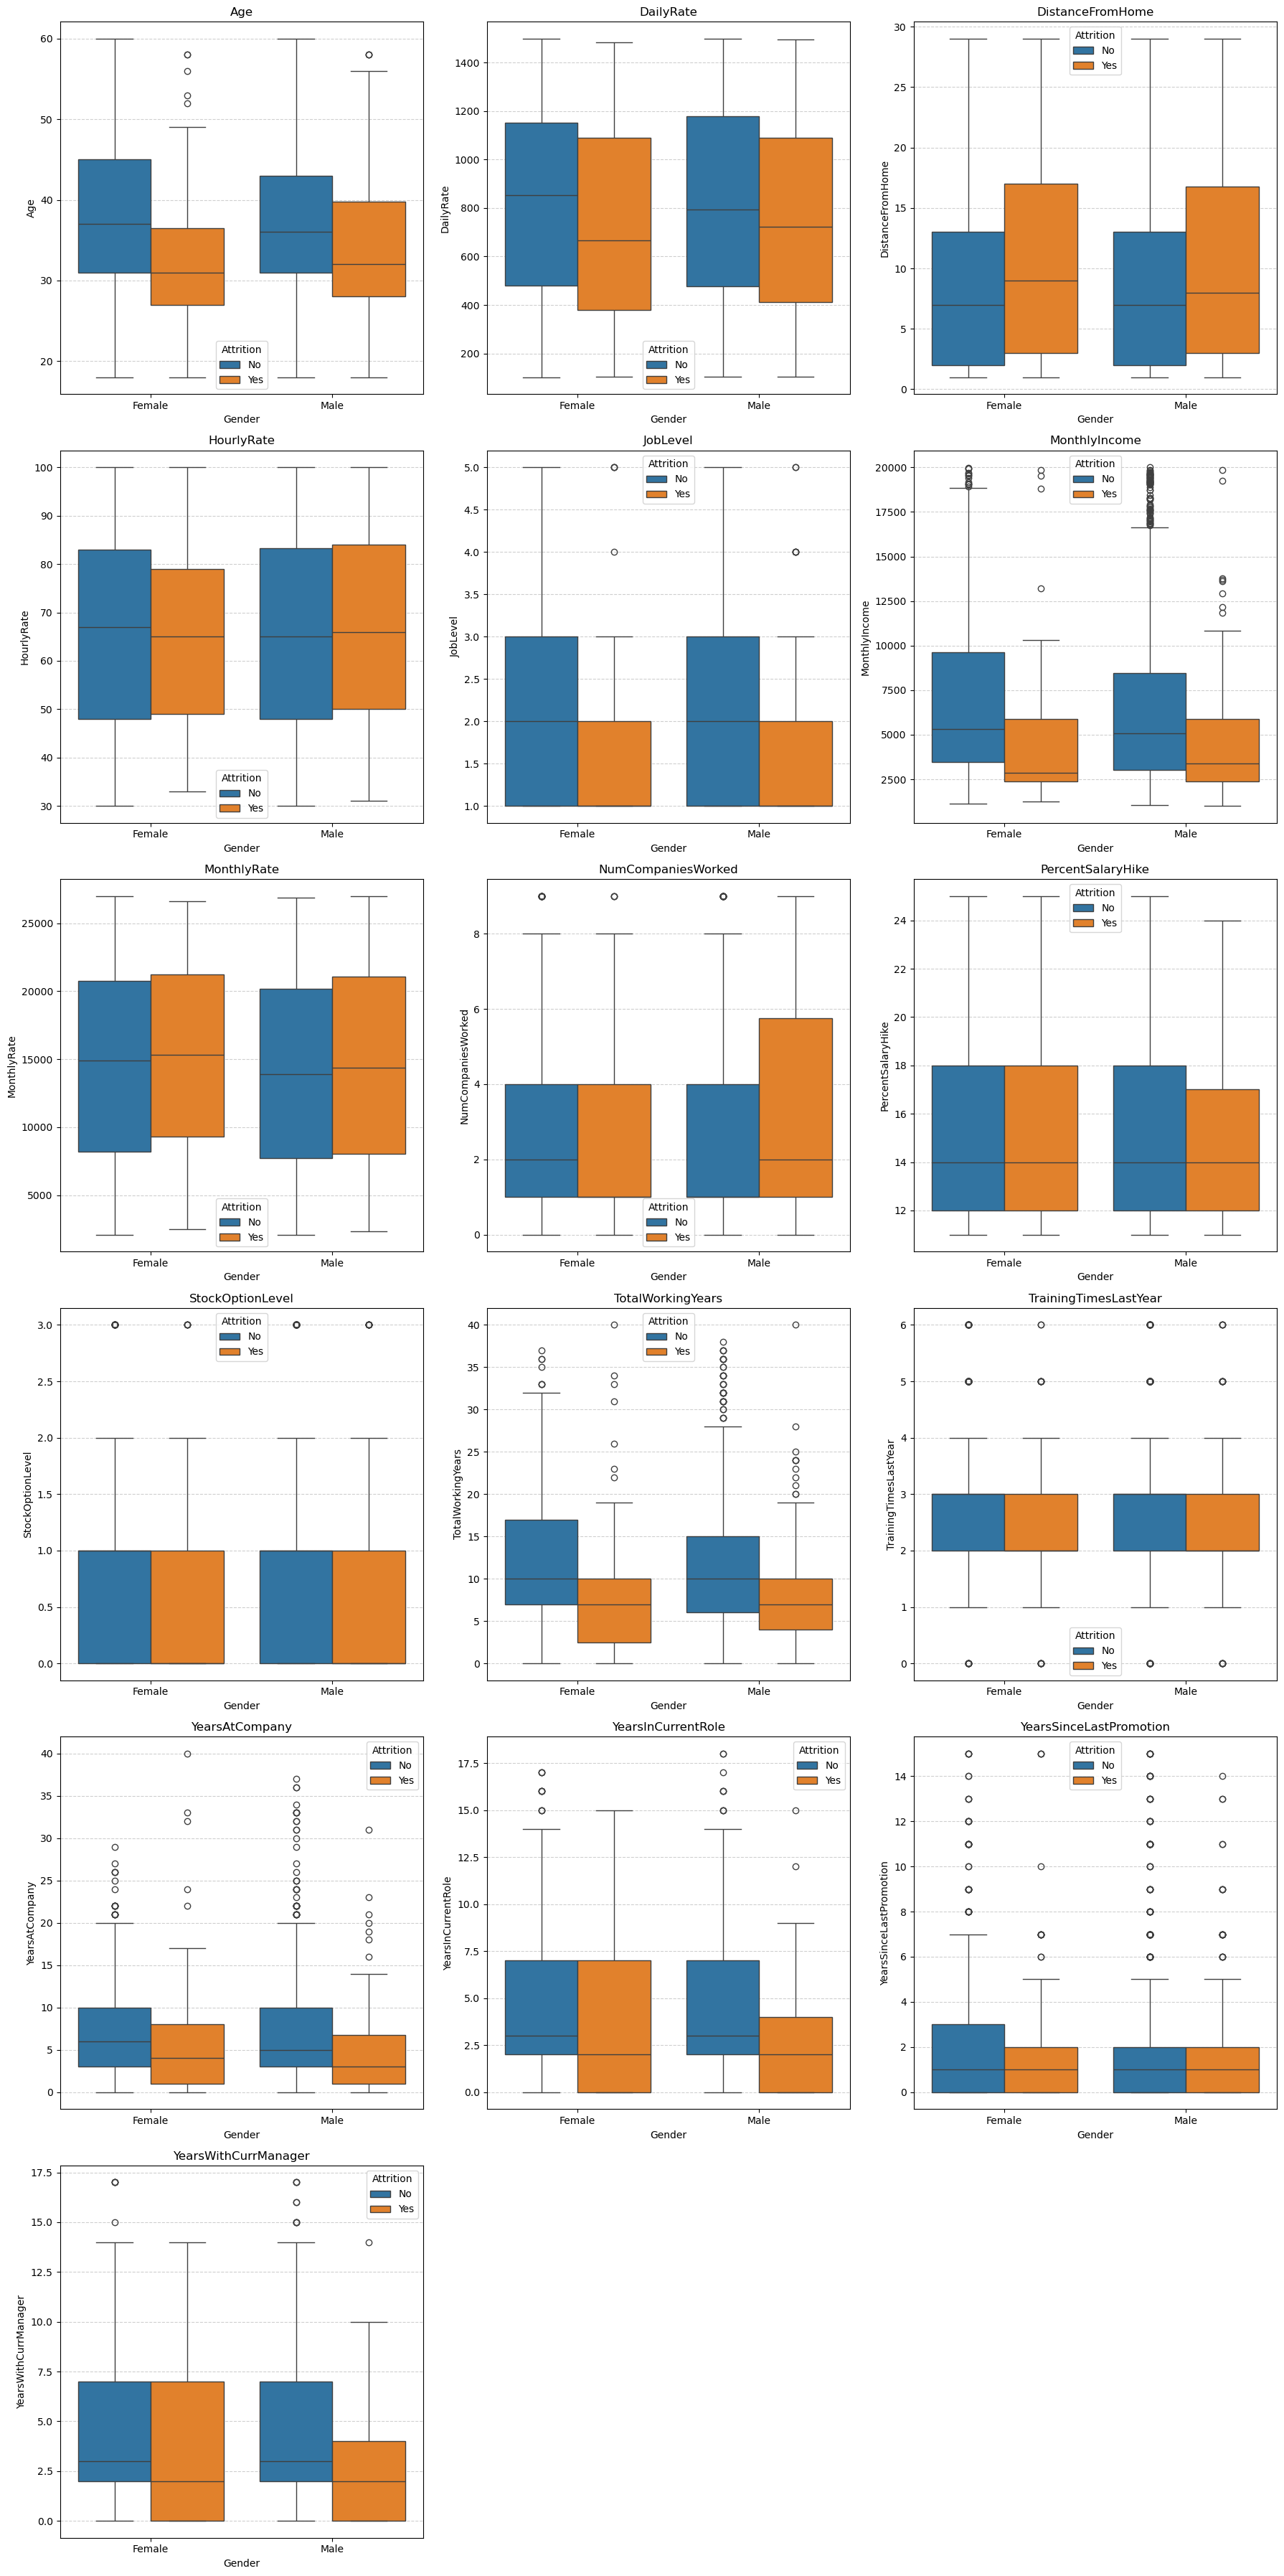

In [108]:
def create_box_plot_panel(data, numerical_vars, gender_var):
    """
    Creates a panel of violin plots to visualize the distribution of numerical
    variables, arranged in a grid.

    Args:
        data: pandas DataFrame containing the data.
        numerical_vars: List of numerical column names to create violin plots for.
    """
    num_vars = len(numerical_vars)
    ncols = min(num_vars, 3)  # Maximum 3 columns
    nrows = (num_vars + ncols - 1) // ncols # Calculate the number of rows

    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 6, nrows * 6))  # Adjust figsize

    if num_vars == 1:
        axes = [axes]  # Ensure axes is iterable

    for i, var in enumerate(numerical_vars):
        row = i // ncols
        col = i % ncols
        ax = axes[row, col] if nrows > 1 else axes[col] # Handle single row case

        #sns.boxplot( x='Attrition',y=var, data=data, ax=ax, hue='Attrition', hue_order = ["No", "Yes"], dodge=False)
        sns.boxplot(x=gender_var, y=var, data=data, ax=ax, hue='Attrition', hue_order = ["No", "Yes"], dodge=True)
        ax.set_title(f'{var} by {gender_var}')
        ax.set_ylabel(var)
        ax.grid(True, linestyle='--', alpha=0.6, axis='y')
        
        
        ax.set_title(f'{var}')
        ax.set_ylabel(var)
        ax.grid(True, linestyle='--', alpha=0.6, axis='y')

    # Remove any unused subplots if num_vars is not a multiple of 3
    if num_vars < nrows * ncols:
        for i in range(num_vars, nrows * ncols):
            row = i // ncols
            col = i % ncols
            ax = axes[row, col] if nrows > 1 else axes[col]
            fig.delaxes(ax)

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    # List categorical columns you want to analyze
    numerical_cols_to_analyze = df.select_dtypes(include='int64').columns
    remove_categorical_cols_encodedasnum = ['Education', 'EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance','Attrition_Flag']

    # Remove columns
    numerical_cols_to_analyze = [column_x for column_x in numerical_cols_to_analyze  if column_x not in remove_categorical_cols_encodedasnum]
    gender_var = 'Gender'

    create_box_plot_panel(df, numerical_cols_to_analyze, gender_var)


In [109]:

from scipy.stats import mannwhitneyu

def test_mannwhitney(data, numerical_vars, group_var):
    """
    Creates a panel of  Performs Mann-Whitney U test
    to compare the distributions of each numerical variable across groups.
    Optionally performs Mann-Whitney U test on y_var aggregated by group_var.

    Args:
    data: pandas DataFrame containing the data.
    numerical_vars: List of numerical column names to  perform the test on.
    group_var: Name of the categorical column to group the  by.
    """

    for i, var in enumerate(numerical_vars):

        # Perform Mann-Whitney U test on numerical vars
        group1_data = data[(data['Gender'] == 'Female') & (data['Attrition'] == 'Yes')][var]
        group2_data = data[(data['Gender'] == 'Male') & (data['Attrition'] == 'Yes')][var]
        u_statistic, p_value = mannwhitneyu(group1_data, group2_data, alternative='two-sided')
        if (p_value <= 0.05):
                print(f"Mann-Whitney U test for {var} by Gender and {group_var[0]}: Yes")
                print(f"U-statistic: {u_statistic:.2f}, P-value: {p_value:.5f}")

        # Perform Mann-Whitney U test on numerical vars
        group1_data = data[(data['Gender'] == 'Female') & (data['Attrition'] == 'No')][var]
        group2_data = data[(data['Gender'] == 'Male') & (data['Attrition'] == 'No')][var]
        u_statistic, p_value = mannwhitneyu(group1_data, group2_data, alternative='two-sided')
        if (p_value <= 0.05):
                print(f"Mann-Whitney U test for {var} by Gender and {group_var[0]}: No")
                print(f"U-statistic: {u_statistic:.2f}, P-value: {p_value:.5f}")
        
if __name__ == '__main__':
    # List categorical columns you want to analyze
    numerical_cols_to_analyze = df.select_dtypes(include='int64').columns
    remove_categorical_cols_encodedasnum = ['Education', 'EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance','Attrition_Flag']

    # Remove columns
    numerical_cols_to_analyze = [column_x for column_x in numerical_cols_to_analyze  if column_x not in remove_categorical_cols_encodedasnum]
    group_var = ['Attrition','Gender'] # Variable to aggregate and compare

    test_mannwhitney(df,numerical_cols_to_analyze, group_var)


Mann-Whitney U test for NumCompaniesWorked by Gender and Attrition: Yes
U-statistic: 5505.50, P-value: 0.03742
Mann-Whitney U test for NumCompaniesWorked by Gender and Attrition: No
U-statistic: 199330.50, P-value: 0.00774
Mann-Whitney U test for TotalWorkingYears by Gender and Attrition: No
U-statistic: 195719.50, P-value: 0.04375
